Maubros:

In [41]:
#Importar librerias basicas
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

Se importan los datos de entrada de Excel Productos

In [42]:
def importarProductos():
    datos = pd.read_excel('Productos.xlsx', usecols=[0,1])
    return datos

def importarOperaciones():
    datos = pd.read_excel('Productos.xlsx')
    return list(datos.columns.values)[2:]

def importarInfoTiempos():
    datos = pd.read_excel('Productos.xlsx')
    return datos


prod = importarProductos()
proc = importarOperaciones()
temps = importarInfoTiempos()



Se reciben las entradas del usuario para las relaciones de productos

In [44]:
etiquetaInstrucciones = widgets.Label(value = 'Defina las relaciones a tratar con los productos')
listaProductos = list(prod['Productos'])
listaWidgetsRelacion = []
for producto in listaProductos:
    listaWidgetsRelacion += [widgets.IntText(value=0, description = producto, disabled = False)]
cajaEntradasRelaciones = widgets.VBox([etiquetaInstrucciones]+listaWidgetsRelacion)

etiquetaMargen = widgets.Label(value = 'Defina parametros para el margen')
listaPrecio = []
listaCosto = []
for producto in listaProductos:
    listaCosto += [widgets.FloatText(value=0, description = 'Costo de ' + producto, disabled = False)]
    listaPrecio += [widgets.FloatText(value=0, description = 'Precio de ' + producto, disabled = False)]
cajaMargen = widgets.VBox([etiquetaMargen]+listaPrecio+listaCosto)


display(cajaEntradasRelaciones, cajaMargen)





Se muestran valores cuellos de botella

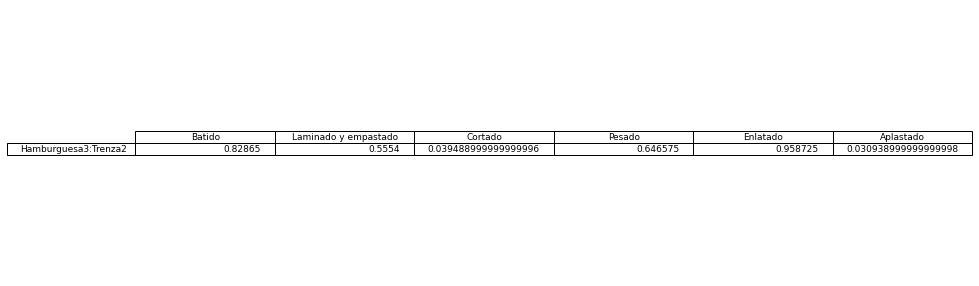

In [45]:
usarDatosTemp = np.transpose(np.array(temps.fillna(0)))[2:]
usarDatosTemp = np.transpose(usarDatosTemp)

colLabel = proc
rLabel = []
nombreRelacion = ''
for i in range(len(listaProductos)):
    nombreRelacion += listaProductos[i] +str(listaWidgetsRelacion[i].value)
    if i+1 != len(prod):
        nombreRelacion += ':'
rLabel += [nombreRelacion]
enCuello = []


temporalCalCuello = 0
for j in range(len(usarDatosTemp)):
    multiplicador = usarDatosTemp[j]
    temporalCalCuello +=  multiplicador * listaWidgetsRelacion[j].value
enCuello += [temporalCalCuello]
fig, ax = plt.subplots()
a = np.array(enCuello)
fig.set_figheight(5)
fig.set_figwidth(15)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
ax.table(cellText = enCuello, colLabels = colLabel, rowLabels = rLabel, loc = 'center')
plt.show()


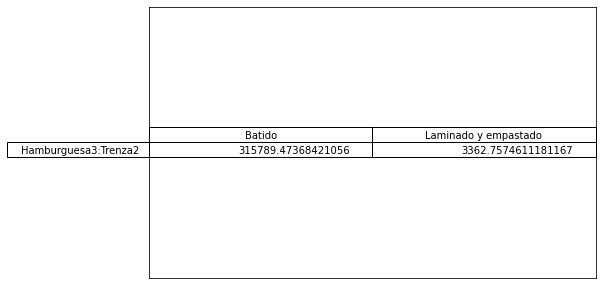

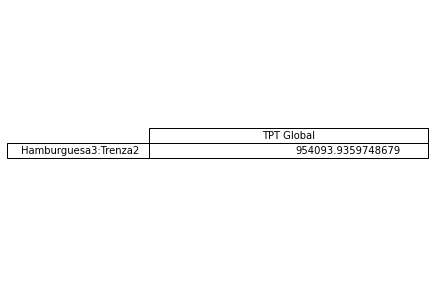

In [46]:
maximos = []
margenes = []
for i in range(len(listaPrecio)):
    margenes += [listaPrecio[i].value - listaCosto[i].value]
indices = []
for temps in usarDatosTemp:
    indices += [np.argmax(enCuello[0])]
tpts = []
for j in range(len(listaProductos)):
    tpts += [margenes[j] / usarDatosTemp[j][indices[j]]]

tptGlobal = 0
for k in range(len(listaProductos)):
    tptGlobal += listaWidgetsRelacion[k].value * tpts[k]

figA, axA = plt.subplots()
figB, axB = plt.subplots()
plt.box(on=False)
axA.table(cellText = [np.array(tpts)], rowLabels = rLabel, colLabels = colLabel, loc = 'center')
figA.set_figheight(5)
figA.set_figwidth(8)
axA.get_xaxis().set_visible(False)
axA.get_yaxis().set_visible(False)
axB.table(cellText = [np.array([tptGlobal])], rowLabels = rLabel, colLabels = ['TPT Global'], loc = 'center')
figB.set_figheight(5)
figB.set_figwidth(5)
axB.get_xaxis().set_visible(False)
axB.get_yaxis().set_visible(False)
plt.show()